# 1. 定义输入数据和卷积核


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# 输入图像数据（假设为识别x）
input_data_origin = np.array(
    [
        [1, -1, -1, -1, -1, -1, 1],
        [-1, 1, -1, -1, -1, 1, -1],
        [-1, -1, 1, -1, 1, -1, -1],
        [-1, -1, -1, 1, -1, -1, -1],
        [-1, -1, 1, -1, 1, -1, -1],
        [-1, 1, -1, -1, -1, 1, -1],
        [1, -1, -1, -1, -1, -1, 1],
    ]
)
# 给input_data最外层添加一圈-1的边框
input_data = np.pad(input_data_origin, pad_width=1, mode="constant", constant_values=-1)

# 卷积核数据（对应图中中间的矩阵）
kernel1 = np.array([[1, -1, -1], [-1, 1, -1], [-1, -1, 1]])
kernel2 = np.array([[1, -1, 1], [-1, 1, -1], [1, -1, 1]])
kernel3 = np.array([[-1, -1, 1], [-1, 1, -1], [1, -1, -1]])
kernel = np.array([kernel1, kernel2, kernel3])

# 2. 实现卷积计算函数


In [408]:
def convolve(input_data, kernel):
    input_height, input_width = input_data.shape
    kernel_height, kernel_width = kernel.shape
    output_height = input_height - kernel_height + 1
    output_width = input_width - kernel_width + 1
    output_data = np.zeros((output_height, output_width))

    for y in range(output_height):
        for x in range(output_width):
            output_data[y, x] = np.sum(
                input_data[y : y + kernel_height, x : x + kernel_width] * kernel
            )

    return output_data


# 为了更好地展示图像，对输出结果进行归一化到 0 - 1 范围（值约大,颜色越白，便于可视化对比）
def normalize(data):
    min_val, max_val = np.min(data), np.max(data)
    return (data - min_val) / (max_val - min_val) if max_val != min_val else data

# 3. 绘图


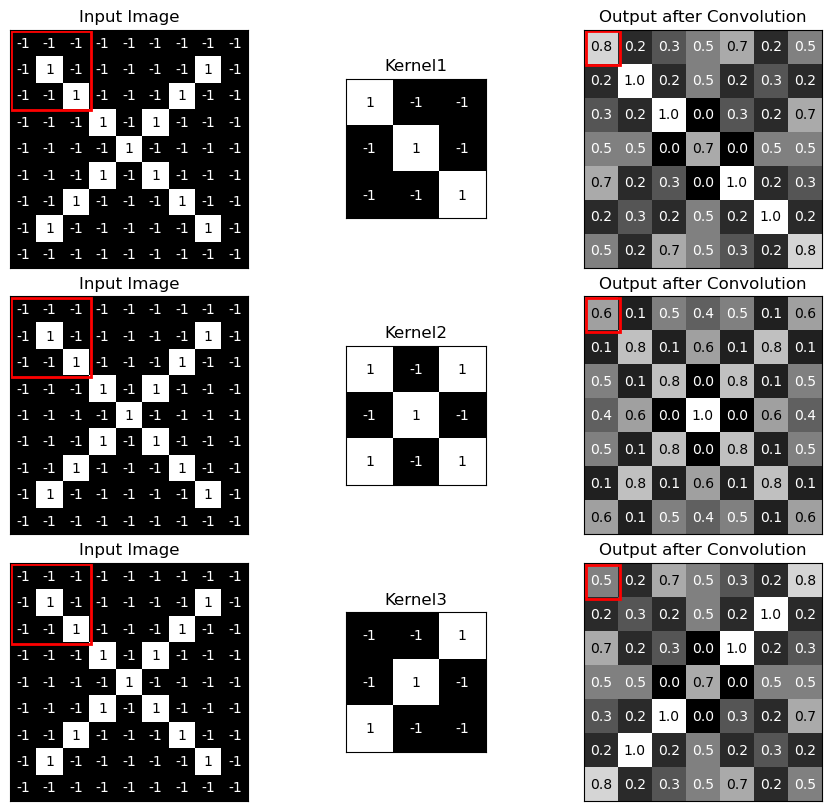

In [409]:
def show_num(data, axes, decimals=0):
    """在图像上显示数字"""
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text_color = "black" if data[i, j] > 0.5 else "white"
            axes.text(j,i,f"{data[i, j]:.{decimals}f}",ha="center",va="center",color=text_color)


# 创建图形
# 计算各数据的宽度（假设用宽度适配，也可用高度）
widths = [input_data.shape[1], kernel.shape[1], input_data.shape[1]]
# gridspec_kw 按数据宽度比例分配子图宽度 , constrained_layout=True自动优化布局
fig, axes = plt.subplots(kernel.shape[0],3,figsize=(10, 8),gridspec_kw={"width_ratios": widths},  constrained_layout=True)
for i in range(kernel.shape[0]):
    # 绘制输入图像
    im0 = axes[i, 0].imshow(normalize(input_data), cmap="gray")
    axes[i, 0].set_title("Input Image")
    # 添加数字标注
    show_num(input_data, axes[i, 0])
    # 添加红色矩形框（注意坐标设置为包围左上角3×3的区域） xy=(-0.45, -0.45) 设置矩形框左上角坐标
    rect = plt.Rectangle(xy=(-0.45, -0.45), width=3,height=3,linewidth=2,edgecolor="red",facecolor="none")
    axes[i, 0].add_patch(rect)

    # 绘制卷积核
    im1 = axes[i, 1].imshow(normalize(kernel[i]), cmap="gray")
    axes[i, 1].set_title("Kernel{0}".format(i + 1))
    show_num(kernel[i], axes[i, 1])

    # 绘制输出结果
    # 执行卷积
    output_data = convolve(input_data, kernel[i])
    im2 = axes[i, 2].imshow(normalize(output_data), cmap="gray")
    axes[i, 2].set_title("Output after Convolution")
    show_num(normalize(output_data), axes[i, 2], 1)
    rect = plt.Rectangle(xy=(-0.45, -0.45), width=1,height=1,linewidth=2,edgecolor="red",facecolor="none")
    axes[i, 2].add_patch(rect)

    # 隐藏刻度线和刻度标签（保留坐标轴框架）
    for ax in axes[i]:
        ax.set_xticks([])  # 移除 x 轴刻度
        ax.set_yticks([])  # 移除 y 轴刻度

plt.show()